## Аугментация

При глубоком обучении иногда можно столкнуться с ситуацией, когда набор данных имеет ограниченный размер. Но чтобы получить лучшие результаты обобщение модели, необходимо иметь больше данных, в том числе и различные их вариации. То есть необходимо увеличить размер исходного набора искусственным образом, и это можно сделать с помощью **аугментации** данных.

**nlpaug** - nlpaug is a library for textual augmentation in machine learning experiments. The goal is improving deep learning model performance by generating textual data. It also able to generate adversarial examples to prevent adversarial attacks.

[nlpaug documentation](https://nlpaug.readthedocs.io/en/latest/index.html)

In [ ]:
!pip install nlpaug

In [ ]:
text = 'There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.'

In [2]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

### Character level augmentation

In [8]:
def get_augmented(input_text, augmenter):
  augmented_text = augmenter.augment(input_text)
  print("Original:")
  print(input_text)
  print("Augmented Text:")
  print(augmented_text)

In [ ]:
get_augmented(text, nac.KeyboardAug(aug_word_p=0.2, aug_word_max=5)) # симуляция опечатки в символе, символ подбирается по расстоянию на клавиатуре

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many tasks in NLP from text classification to Wurs4ion answering but whatever you do the amount of waHa you have to train your moF$l impacts the m9dSl perfoejaBXe heavily.']


In [ ]:
get_augmented(text, nac.OcrAug(aug_word_p=0.3, aug_word_max=10)) # симуляция ошибки OCR (I == 1)

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many tasks in NLP fkum text c1a88ificatiun to question answering 6ot whatever you do the amount of data yuo have tu train your model impact8 the m0de1 pekfukmance heavi1y.']


In [ ]:
get_augmented(text, nac.RandomCharAug(aug_word_p=0.2, aug_word_max=10)) # симуляция случайной опечатки

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are ma(M tasks in NLP xAom ZeBt classification to question answering but whatever you do the zmounF of data you have to ttaiu your model im@aKtZ the model prRfwr&ance heavily.']


### Word level augmentation 

#### Замена слов по смыслу

In [ ]:
get_augmented(text, naw.AntonymAug(aug_p=0.2)) # замена по смыслу на антонимы

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There differ few tasks in NLP from text classification to question answering but whatever you unmake the amount of data you refuse to train your model impacts the model performance lightly.']


In [ ]:
get_augmented(text, naw.SynonymAug(aug_p=0.2)) # замена по смыслу на синонимы

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many tasks in NLP from text categorisation to question answering merely whatever you do the sum of data you have to train your model impacts the model operation heavily.']


#### Операции со словами

In [ ]:
get_augmented(text, naw.SplitAug(aug_p=0.2)) # пробелы в случайных местах

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many ta sks in NLP from text classification to question answering but whatever you do the a mount of data you ha ve to tr ain yo ur mod el impacts the model performance heav ily.']


In [ ]:
get_augmented(text, naw.RandomWordAug(action='delete', aug_p=0.2)) # убирает случайные слова. Доступные action = ‘substitute’, ‘swap’, ‘delete’ or ‘crop’.

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There many in NLP from text classification question answering but do the amount of data you have to your model impacts model performance heavily.']


In [ ]:
get_augmented(text, naw.RandomWordAug(action='substitute', aug_p=0.2))

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['_ are many tasks in _ from text classification to question answering but _ you do the amount of data you have to train _ model impacts _ _ performance _.']


#### Back translation

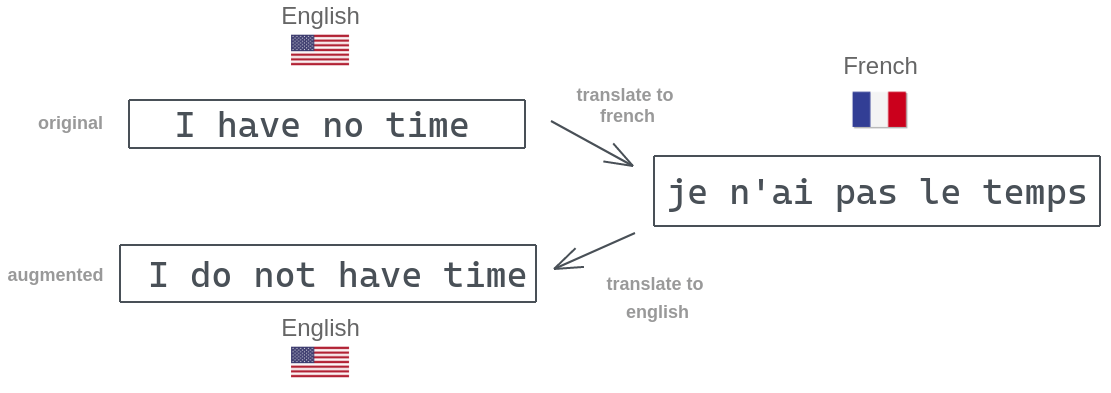

[Доступные модели](https://huggingface.co/models?search=Helsinki-NLP&pipeline_tag=translation)

In [6]:
!pip install transformers

In [ ]:
!pip install sacremoses 

In [ ]:
get_augmented(text, naw.BackTranslationAug(from_model_name='facebook/wmt19-en-de', to_model_name='facebook/wmt19-de-en')) # можно задать device

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many tasks in NLP, from text classification to answering questions, but whatever you do, the amount of data you need to train your model greatly affects the performance of the model.']


### Sentence level augmentation

In [ ]:
get_augmented(text, nas.ContextualWordEmbsForSentenceAug(model_path='distilgpt2'))

Original:
There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.
Augmented Text:
['There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily. is A You I The , In The D It There This G .']


#### Abstractive Summarization

In [3]:
article = """
The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.
"""

In [9]:
get_augmented(article, nas.AbstSummAug(model_path='t5-base')) # можно задать device

Original:

The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.

Augmented Text:
['the history of natural language processing (NLP) generally started in the 

### Tips

- Не стоит валидироваться на аугментированных данных и вообще их переоценивать
- При использовании k-fold валидации аугментированные и исходные данные должны быть в одном фолде
- Универсальной для всех случаев аугментации не существует
- Можно их миксовать
- При этом не всегда увеличение количества данных будет влиять на качество :с

## Что еще почитать?

[Data Augmentation Using Pre-trained Transformer Models](https://arxiv.org/pdf/2003.02245.pdf)

[Аугментация для текстов](https://alexanderdyakonov.wordpress.com/2020/11/09/text-augmentation/)
